<a href="https://colab.research.google.com/github/fajemila/demo_repo2/blob/master/runmila1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [3]:
!unzip "/content/gdrive/My Drive/Runmila/images_fullsize.zip"

Archive:  /content/gdrive/My Drive/Runmila/images_fullsize.zip
   creating: test/
  inflating: test/TBLBHSYT.png       
  inflating: test/KHIMVBMD.png       
  inflating: test/RQZCAYRX.png       
  inflating: test/SMENQGVO.png       
  inflating: test/HLQHFYIS.png       
  inflating: test/UXFTRJWE.png       
  inflating: test/QUUDWCHL.png       
  inflating: test/RTAHZTRY.png       
  inflating: test/HIJQIQJT.png       
  inflating: test/FWEHCLXU.png       
  inflating: test/WTATMMWS.png       
  inflating: test/FTBBVMHK.png       
  inflating: test/PCPQBVFW.png       
  inflating: test/CMJPTDMO.png       
  inflating: test/FJQDGUND.png       
  inflating: test/TUSENBWD.png       
  inflating: test/KIRUHEIC.png       
  inflating: test/KBAKWKNW.png       
  inflating: test/LPFSZWIK.png       
  inflating: test/KVHDQRUE.png       
  inflating: test/UHRZNUCQ.png       
  inflating: test/RNEYKHMR.png       
  inflating: test/SIEWUKNU.png       
  inflating: test/AAKRKIZP.png       
  infl

In [4]:
!pip install efficientnet_pytorch torchtoolbox
!pip install resnet_pytorch

     |████████████████████████████████| 61kB 2.7MB/s 
  Created wheel for efficientnet-pytorch: filename=efficientnet_pytorch-0.7.0-cp36-none-any.whl size=16031 sha256=a79a3e705f6869b44e0e8092bb98900ba9e789f20f26ea0c3612f1de549f8fef
  Stored in directory: /root/.cache/pip/wheels/e9/c6/e1/7a808b26406239712cfce4b5ceeb67d9513ae32aa4b31445c6
Successfully built efficientnet-pytorch


In [5]:
from torchvision.transforms import transforms
import torch
import torch.nn.functional as F
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader, Subset
from sklearn.model_selection import StratifiedKFold, GroupKFold, train_test_split
import pandas as pd
import os
import warnings
import matplotlib.pyplot as plt
from efficientnet_pytorch import EfficientNet
from resnet_pytorch import ResNet
%matplotlib inline

In [6]:
# root_dir = ""
batch_size = 8
valid_split = 0.2
shuffle_dataset = True
random_seed = 42

In [7]:
os.getcwd()
labels = pd.read_csv('/content/gdrive/My Drive/Train.csv')
submission = pd.read_csv('/content/gdrive/My Drive/SampleSubmission.csv')
test = pd.read_csv('/content/gdrive/My Drive/Test.csv')


In [8]:
labels.head()

,filename,ID,LABEL
0,train/VTYNBFTO.png,VTYNBFTO,1
1,train/GVVXXDOZ.png,GVVXXDOZ,0
2,train/PMRSQLXN.png,PMRSQLXN,0
3,train/JXISWDUU.png,JXISWDUU,1
4,train/JVWMAACC.png,JVWMAACC,1


In [9]:
test.head()

,filename,ID
0,test/GTWSHFYQ.png,GTWSHFYQ
1,test/QTFSSMGD.png,QTFSSMGD
2,test/TBLBHSYT.png,TBLBHSYT
3,test/ZKETEOFG.png,ZKETEOFG
4,test/GKTPBGZP.png,GKTPBGZP


In [10]:
labels.tail()#test

,filename,ID,LABEL
713,train/EWGJDECH.png,EWGJDECH,1
714,train/CJEVKQUT.png,CJEVKQUT,1
715,train/YDXXBDGI.png,YDXXBDGI,1
716,train/QLUOORWZ.png,QLUOORWZ,0
717,train/HFAGCLGV.png,HFAGCLGV,1


In [11]:
labels['LABEL'].value_counts()

0    365
1    353
Name: LABEL, dtype: int64

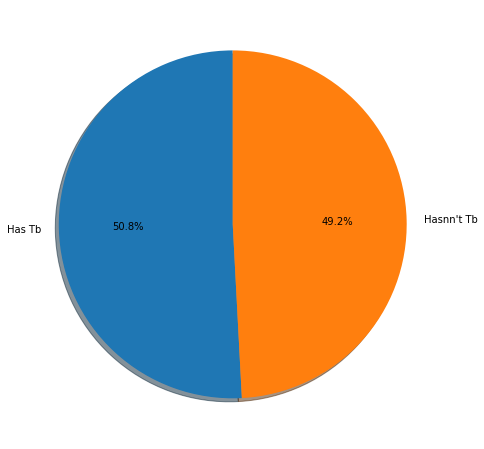

In [12]:
label = 'Has Tb' , "Hasnn\'t Tb"
plt.figure(figsize=(8,8))
plt.pie(labels.groupby('LABEL').size(),labels=label,autopct='%1.1f%%',shadow=True,startangle=90)
plt.show()

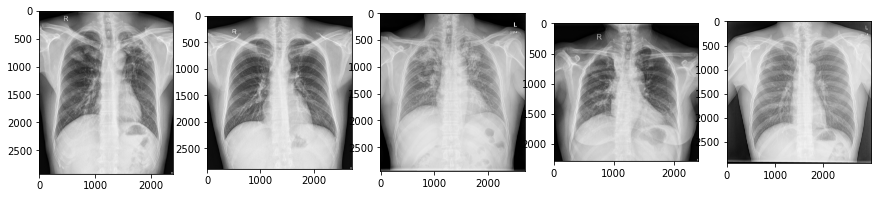

In [13]:
import matplotlib.image as img
fig,ax = plt.subplots(1,5,figsize=(15,3))

for i,idx in enumerate(labels[labels['LABEL'] == 1]['filename'][-5:]):
    path = idx
    ax[i].imshow(img.imread(path))

In [ ]:
for ind in labels[labrls['LABEL']==1]['filename'][-5:]:
  patth = ind
  imgr = img.imread(patth)#rad

196608
(256, 256, 3)
<class 'numpy.ndarray'>
196608
(256, 256, 3)
<class 'numpy.ndarray'>
196608
(256, 256, 3)
<class 'numpy.ndarray'>
196608
(256, 256, 3)
<class 'numpy.ndarray'>
196608
(256, 256, 3)
<class 'numpy.ndarray'>


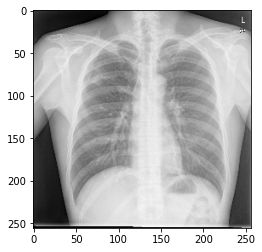

In [27]:
from PIL import Image
import cv2
for ind in labels[labels['LABEL']==1]['filename'][-5:]:
  pathe = ind
  #imgr = img.imread(pathe)
 #
 # imgr = Image.open(pathe).convert('RGB')
  #
  imgr = cv2.imread(pathe)#,0)
  #imgr = cv2.cvtColor(imgr,cv2.COLOR_BGR2GRAY)#ol)
  #
  imgr = cv2.resize(imgr,dsize=(256,256))
  #trimgr = transform
  #s.Grayscale()
  #
  #@tnimgr = transforms.ToNumpy()
  #tqimgr = transforms.ToPILImage()#imgr)
 # twimgr = transforms.Resize((1000,1000))
  #ttimgr = transforms.ToTensor()
  #print(imgr.dtype)trim
  print(imgr.size)
  print(imgr.shape)#oe)
  #imgr = transforms.ToTensor(imgr)
  print(type(imgr))
  plt.imshow(imgr)
  #plt.imshow(ttimgr(imgr))
 # plt.imshplt.ow(ttimgr(tnimgr(imgr)))
 # plt.imshow(ttimgr(twimgr(tqimgr()))) 
 # plt.imshow(ttimgr(twimgr(trimgr(imgr))))
 # plt.imshow(ttimgr(tqimgr(imgr)))#y
 # plt.imshow(twimgr(ttimgr(imgr)))
 # plt.imshow(tqimgr(imgr))
 # plt.imshow(twimgr(tqimgr(imgr)))
  #plt.imshow(ttimgr(ttimgr(twimgr(tqimgr(imgr)))))

In [16]:
import numpy as np
import matplotlib.pyplot as plt

def imshow(image, ax=None, title=None, normalize=True):
    if ax is None:
        fig, ax = plt.subplots()
        image = image.numpy().transpose((1, 2, 0))
    if normalize:
        mean = np.array([0.485, 0.456, 0.406])
        std = np.array([0.229, 0.224, 0.225])
        image = std * image + mean
        image = np.clip(image, 0, 1)
        ax.imshow(image)
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['left'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        ax.tick_params(axis='both', length=0)
        ax.set_xticklabels('')
        ax.set_yticklabels('')
    return ax

In [14]:
class RunmilaDataset(Dataset):
    def __init__(self, data, path , traindata = None, transform = None):
        super().__init__()
        self.data = data
        self.path = path
        self.transform = transform
        self.traindata = traindata
    def __len__(self):
        return len(self.data)
    def __getitem__(self,index):
        img_path = self.data.iloc[index]['filename']
        #image = img
        image = cv2.imread(img_path)#,0)#cv2.IMREAD_GRAYSCALE)
      #  image = np.array(image,dtype=np.uint8)#full()
       # image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)#_COLOR_GRAY2RGB)#imrea
        image = torch.Tensor(cv2.resize(image,dsize= (256,256))).permute(2,0,1)#.permute(0,3,1,2)
        if self.transform:#s:
            image = self.transform(image)#s(image)
            
        if self.traindata:
            label = self.data.iloc[index]['LABEL']#['target']
            return image,label
        else:
            return image

In [ ]:
import numpy as np
means = np.array([0.485, 0.456, 0.406])
std = np.array([0.229, 0.224, 0.225])

In [ ]:
train_transform = transforms.Compose([#
                                      transforms.ToPILImage(),
                                      transforms.Resize((224,224)),
                                #      transforms.ToPILImage(),
                                      transforms.ToTensor(),
                                      #
                                      transforms.Normalize((0.5),(0.5))
                                      ])#means,std)])
test_transform = transforms.Compose([#
                                     transforms.ToPILImage(),
                                     transforms.Resize((224,224)),
                              #       transforms.ToPILImage(),
                                     transforms.ToTensor(),
                                    # 
                                     transforms.Normalize((0.5),(0.5))
                                     ])#means,std)])
valid_transform = transforms.Compose([transforms.ToPILImage(),
                                      transforms.ToTensor(),
                                      transforms.Normalize(means,std)])

In [15]:
train, valid_data = train_test_split(labels, stratify=labels.LABEL,test_size=0.2)

In [16]:
train_path = ''
test_path = ''

In [17]:
train_df = pd.merge(train,labels,how='inner')
valid_df = pd.merge(valid_data,labels,how='inner')

In [31]:
train_data = RunmilaDataset(train_df, train_path,traindata=True)#, transform = train_transform )
valid_data = RunmilaDataset(valid_df, train_path,traindata=True)#, transform=valid_transform )
test_data = RunmilaDataset(submission, test_path)#, transform=test_transform )

In [19]:
num_epochs = 35
num_classes = 2
batch_size = 25
learning_rate = 0.001

In [20]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda', index=0)

In [35]:
train_loader = DataLoader(dataset = train_data, batch_size = batch_size,shuffle = False,num_workers=0)
valid_loader = DataLoader(dataset = valid_data, batch_size = batch_size-15,shuffle = False,num_workers=0)
test_loader = DataLoader(dataset = test_data, batch_size = batch_size, shuffle = False,num_workers=0)

In [ ]:
from PIL import Image
imagr = img.imread()

In [ ]:
trainimages, trainlabels = next(iter(train_loader))

fig, axes = plt.subplots(figsize=(12, 12), ncols=5)
print('training images')
for i in range(5):
    axe1 = axes[i]
    plt.imshow(trainimages)#[i],)
   # imshow(trainimages[i], ax=axe1, normalize=False)
print(trainimages[0].size())

In [22]:
epochs = 35
batch_size = 25
learning_rate = 0.001

In [81]:
import torch
import torch.nn as nn
import torch.nn.functional as F
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3-2+2, out_channels=10, kernel_size=3)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=3)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(720, 1024)
        self.fc2 = nn.Linear(1024, 1)
    def forward(self, x):
        x = x.permute(0,3,1,2)
        x = x.float()
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
       # 
        x = x.view(x.shape[0],-1)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return x

In [23]:
model = EfficientNet.from_pretrained('efficientnet-b1')
for param in model.parameters():
    param.require_grad = False

Downloading: "https://github.com/lukemelas/EfficientNet-PyTorch/releases/download/1.0/efficientnet-b1-f1951068.pth" to /root/.cache/torch/hub/checkpoints/efficientnet-b1-f1951068.pth



Loaded pretrained weights for efficientnet-b1


In [24]:
num_ftrs = model._fc.in_features
model._fc = nn.Linear(num_ftrs,1)
model.to(device)

EfficientNet(
  (_conv_stem): Conv2dStaticSamePadding(
    3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False
    (static_padding): ZeroPad2d(padding=(1, 1, 1, 1), value=0.0)
  )
  (_bn0): BatchNorm2d(32, eps=0.001, momentum=0.010000000000000009, affine=True, track_running_stats=True)
  (_blocks): ModuleList(
    (0): MBConvBlock(
      (_depthwise_conv): Conv2dStaticSamePadding(
        32, 32, kernel_size=(3, 3), stride=[1, 1], groups=32, bias=False
        (static_padding): ZeroPad2d(padding=(1, 1, 1, 1), value=0.0)
      )
      (_bn1): BatchNorm2d(32, eps=0.001, momentum=0.010000000000000009, affine=True, track_running_stats=True)
      (_se_reduce): Conv2dStaticSamePadding(
        32, 8, kernel_size=(1, 1), stride=(1, 1)
        (static_padding): Identity()
      )
      (_se_expand): Conv2dStaticSamePadding(
        8, 32, kernel_size=(1, 1), stride=(1, 1)
        (static_padding): Identity()
      )
      (_project_conv): Conv2dStaticSamePadding(
        32, 16, kernel_size=

In [82]:
model = CNN()
print(model)

CNN(
  (conv1): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(10, 20, kernel_size=(3, 3), stride=(1, 1))
  (conv2_drop): Dropout2d(p=0.5, inplace=False)
  (fc1): Linear(in_features=720, out_features=1024, bias=True)
  (fc2): Linear(in_features=1024, out_features=1, bias=True)
)


In [25]:
# model = CNN().to(device)
#criterion = nn.CrossEntropyLoss()
criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters(),lr = learning_rate)

In [36]:
#%%time
# keeping-track-of-losses
train_losses = []
valid_losses = []
for epoch in range(1, num_epochs + 1):
    # keep-track-of-training-and-validation-loss
    train_loss = 0.0
    valid_loss = 0.0
    # training-the-model
    model.train()
    for data, target in train_loader:
        # move-tensors-to-GPU
        data = data.to(device)
        target = target.to(device)
        # clear-the-gradients-of-all-optimized-variables
        optimizer.zero_grad()
        # forward-pass: compute-predicted-outputs-by-passing-inputs-to-t
        output = model(data)
        target = target.unsqueeze(1).type_as(output)
        # calculate-the-batch-loss
        loss = criterion(output, target)
        # backward-pass: compute-gradient-of-the-loss-wrt-model-paramete
        loss.backward()
        # perform-a-ingle-optimization-step (parameter-update)
        optimizer.step()
        # update-training-loss
        train_loss += loss.item() * data.size(0)
    model.eval()
    for data, target in valid_loader:
        data = data.to(device)
        target = target.to(device)
        output = model(data)
        loss = criterion(output, target.unsqueeze(1).type_as(output))
        # update-average-validation-loss
        valid_loss += loss.item() * data.size(0)
    # calculate-average-losses
    train_loss = train_loss/len(train_loader.sampler)
    valid_loss = valid_loss/len(valid_loader.sampler)
    train_losses.append(train_loss)
    valid_losses.append(valid_loss)
    # print-training/validation-statistics
    print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.f(epoch, train_loss, valid_loss))

RuntimeError: ignored

In [29]:
criterion(output,target)

tensor(0.4645, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)

In [ ]:
# test-the-model
model.eval() # it-disables-dropout
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in valid_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    print('Test Accuracy of the model: {} %'.format(100 * correct / tota
    # Save
    torch.save(model.state_dict(), 'model.ckpt')